In [1]:
import matplotlib_inline.backend_inline
import seaborn as sns

sns.set_style(style="white")
sns.set_context("talk")

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")


In [2]:
import h5py
import numpy as np

f = h5py.File('./2layer_128.jld2', 'r')
grid = f['grid']
snapshots = f['snapshots']

# Initialize the grid of x and y coordinates
x = grid['x'][()]
y = grid['y'][()]

# Grab u, v, and q for all snapshots and layers (we will just use the top layer)
u = snapshots['u']
v = snapshots['v']
q = snapshots['q']

In [3]:
!pip install ../../fluidsf
import fluidsf

sfs_2D_maps = fluidsf.generate_2D_SF_maps(u['9950'][0], v['9950'][0], x, y)

sfs_list = fluidsf.generate_structure_functions(u['9950'][0], v['9950'][0], x, y)

#sfs_2D_maps = [
#    fluidsf.generate_2D_SF_maps(u[d][0], v[d][0], x, y)
#    for d in u.keys()]

#sfs_list = [
#    fluidsf.generate_structure_functions(u[d][0], v[d][0], x, y)
#    for d in u.keys()]

Processing /Users/brodiepearson/Documents/GitHub/fluidsf
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for fluidsf: filename=fluidsf-0.0.0-py3-none-any.whl size=15200 sha256=653281a8950961978f71f5a2bccd681c8802a92ef3c5235ab1a45e1e7e694e4d
  Stored in directory: /private/var/folders/s4/b0kf2lp10_xgphdc7j7z3clh0000gn/T/pip-ephem-wheel-cache-p00melwz/wheels/1d/4f/21/69cb52e95b42999ca97ae78018dc45ae8761ebf52634e7b41c
Successfully built fluidsf
  Attempting uninstall: fluidsf
    Found existing installation:

In [9]:
sfs_list
sfs_list['x-diffs']

array([0.        , 0.04908739, 0.09817477, 0.14726216, 0.19634954,
       0.24543693, 0.29452431, 0.3436117 , 0.39269908, 0.44178647,
       0.49087385, 0.53996124, 0.58904862, 0.63813601, 0.68722339,
       0.73631078, 0.78539816, 0.83448555, 0.88357293, 0.93266032,
       0.9817477 , 1.03083509, 1.07992247, 1.12900986, 1.17809725,
       1.22718463, 1.27627202, 1.3253594 , 1.37444679, 1.42353417,
       1.47262156, 1.52170894, 1.57079633, 1.61988371, 1.6689711 ,
       1.71805848, 1.76714587, 1.81623325, 1.86532064, 1.91440802,
       1.96349541, 2.01258279, 2.06167018, 2.11075756, 2.15984495,
       2.20893233, 2.25801972, 2.3071071 , 2.35619449, 2.40528188,
       2.45436926, 2.50345665, 2.55254403, 2.60163142, 2.6507188 ,
       2.69980619, 2.74889357, 2.79798096, 2.84706834, 2.89615573,
       2.94524311, 2.9943305 , 3.04341788, 3.09250527])

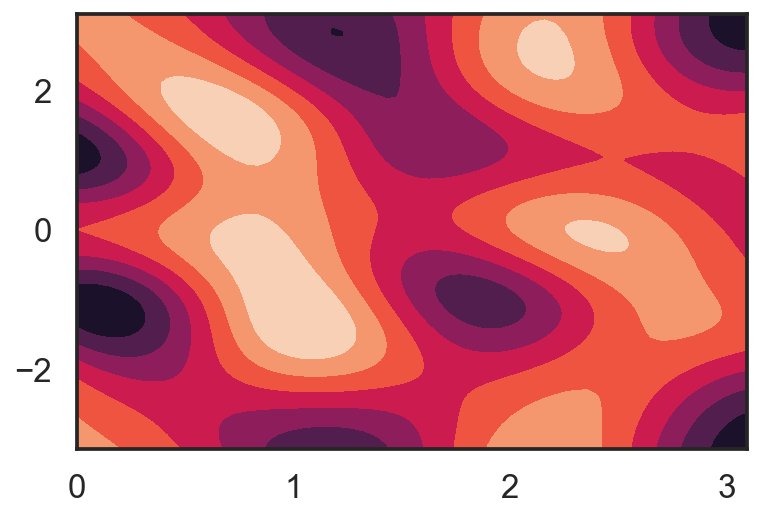

In [11]:
fig1, ax1 = plt.subplots()

CS = ax1.contourf(sfs_2D_maps['x_separations'],
            sfs_2D_maps['y_separations'],
            sfs_2D_maps['SF_velocity_advection_xy'])
cbar = fig.colorbar

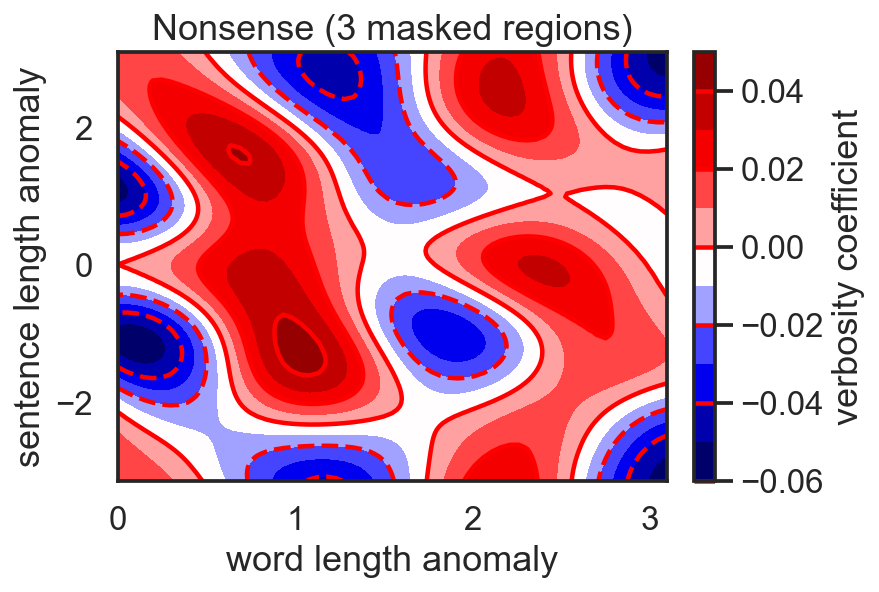

In [12]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(sfs_2D_maps['x_separations'],
            sfs_2D_maps['y_separations'],
            sfs_2D_maps['SF_velocity_advection_xy'], 
            10, cmap=plt.cm.seismic)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r')

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

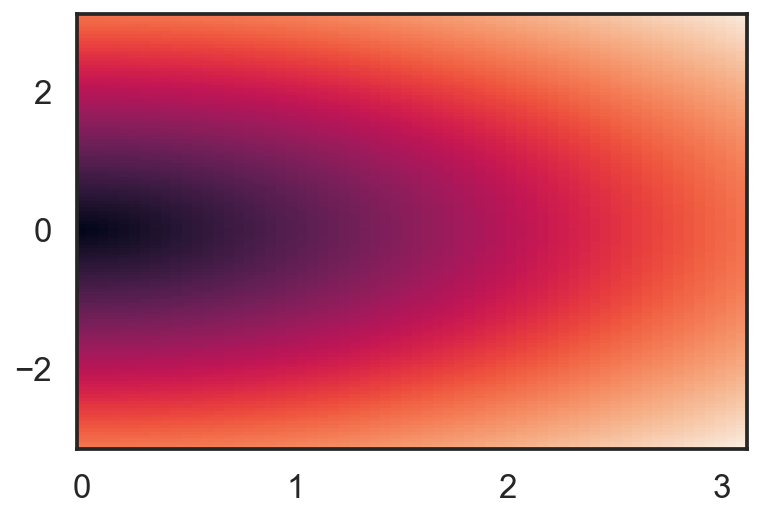

In [15]:
fig1, ax1 = plt.subplots()

CS = ax1.pcolormesh(sfs_2D_maps['x_separations'],
                    sfs_2D_maps['y_separations'],
            sfs_2D_maps['separation_distances'])
plt.colorbar

Text(0, 0.5, 'verbosity coefficient')

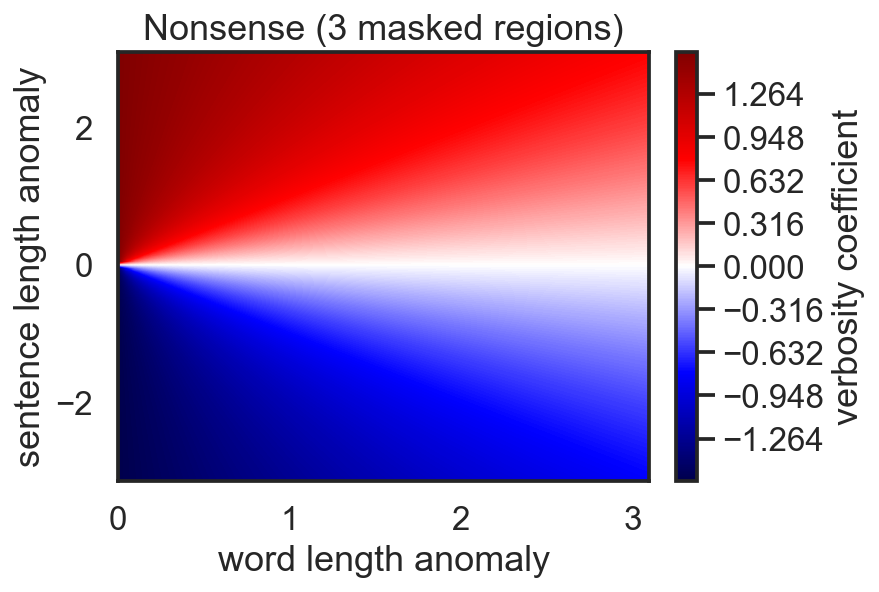

In [16]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(sfs_2D_maps['x_separations'],
            sfs_2D_maps['y_separations'],
            sfs_2D_maps['separation_angles'], 
            1000, cmap=plt.cm.seismic)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r')

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)

Text(0, 0.5, 'verbosity coefficient')

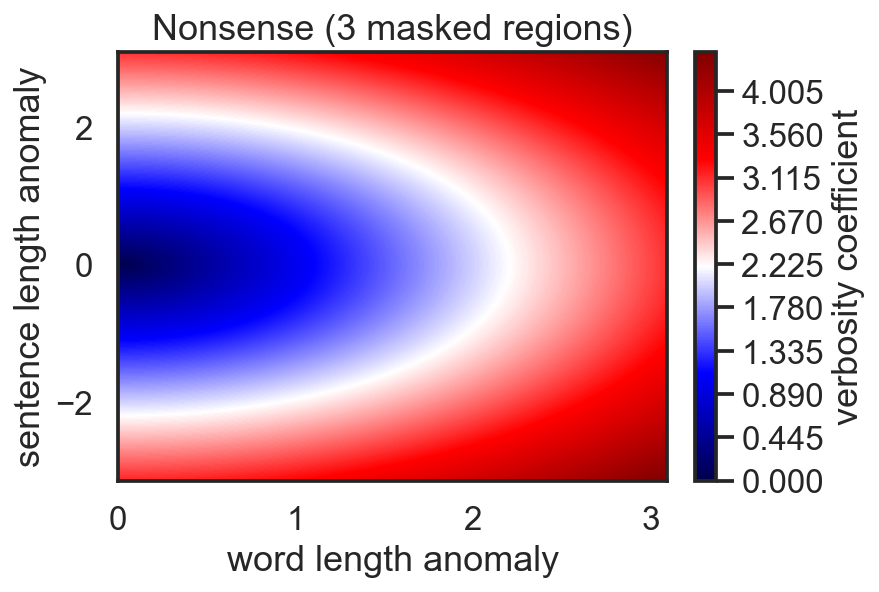

In [17]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(sfs_2D_maps['x_separations'],
            sfs_2D_maps['y_separations'],
            sfs_2D_maps['separation_distances'], 
            1000, cmap=plt.cm.seismic)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r')

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')


Text(0, 0.5, 'verbosity coefficient')

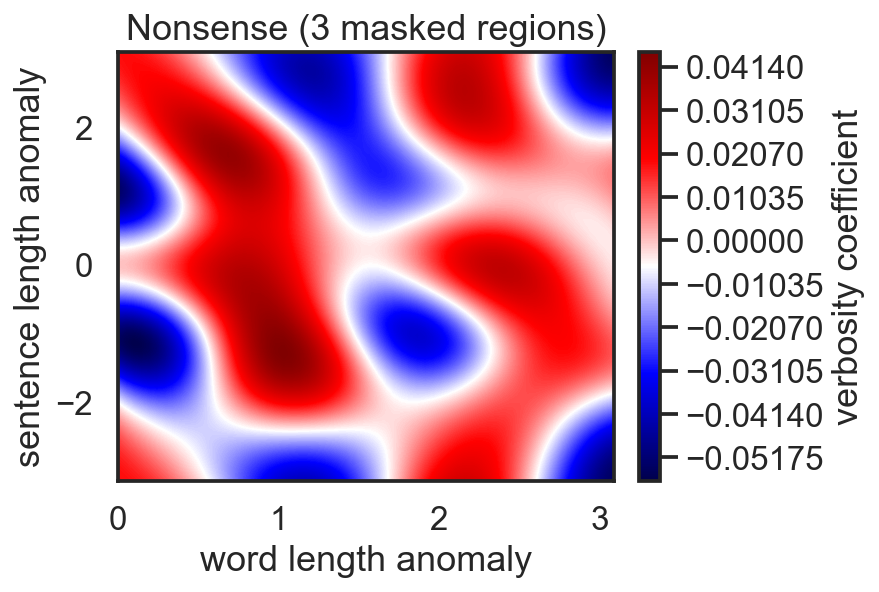

In [19]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(sfs_2D_maps['x_separations'],
            sfs_2D_maps['y_separations'],
            sfs_2D_maps['SF_velocity_advection_xy'], 
            1000, cmap=plt.cm.seismic)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r')

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')

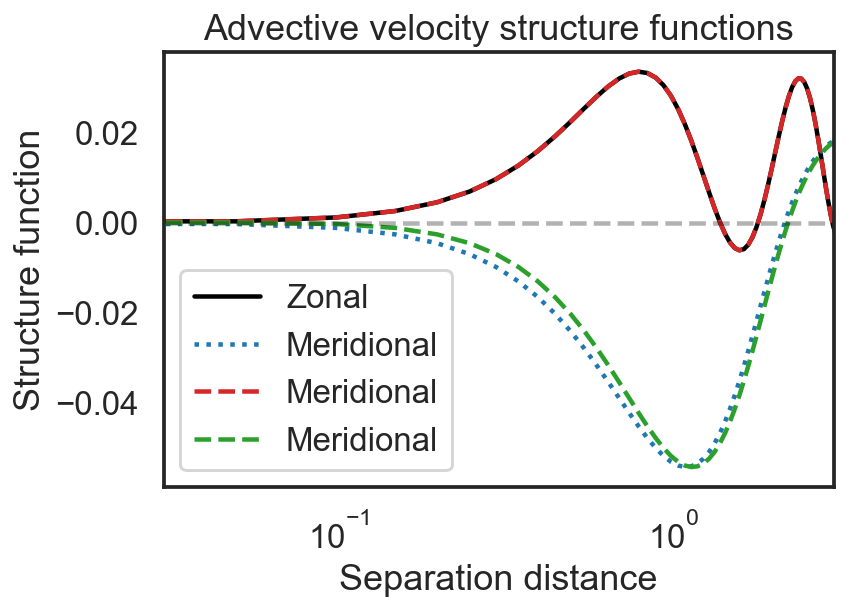

In [21]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots()

ax1.semilogx(sfs_list['x-diffs'], sfs_list['SF_advection_velocity_x'],label=r'Zonal',color='k')
ax1.semilogx(sfs_list['y-diffs'], sfs_list['SF_advection_velocity_y'], label=r'Meridional',
             color='tab:blue', linestyle='dotted')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_velocity_advection_xy'][:,64], label=r'Meridional',
             color='tab:red', linestyle='dashed')
ax1.semilogx(sfs_list['y-diffs'], sfs_2D_maps['SF_velocity_advection_xy'][0,63:-1], label=r'Meridional',
             color='tab:green', linestyle='dashed')

ax1.set_ylabel(r"Structure function")
ax1.set_xlabel(r"Separation distance")
ax1.set_xlim(3e-2,3e0)
ax1.legend()
plt.hlines(0,3e-2,3e0,color='k',linestyle='dashed',alpha=0.3)
plt.title('Advective velocity structure functions');

In [24]:
test_x_array = np.append(-np.flip(sfs_2D_maps['x_separations']), sfs_2D_maps['x_separations'], axis=0)
test_x_array

array([[-3.09250527, -3.09250527, -3.09250527, ..., -3.09250527,
        -3.09250527, -3.09250527],
       [-3.04341788, -3.04341788, -3.04341788, ..., -3.04341788,
        -3.04341788, -3.04341788],
       [-2.9943305 , -2.9943305 , -2.9943305 , ..., -2.9943305 ,
        -2.9943305 , -2.9943305 ],
       ...,
       [ 2.9943305 ,  2.9943305 ,  2.9943305 , ...,  2.9943305 ,
         2.9943305 ,  2.9943305 ],
       [ 3.04341788,  3.04341788,  3.04341788, ...,  3.04341788,
         3.04341788,  3.04341788],
       [ 3.09250527,  3.09250527,  3.09250527, ...,  3.09250527,
         3.09250527,  3.09250527]])

In [25]:
test_y_array = np.append(-np.flip(sfs_2D_maps['y_separations']), sfs_2D_maps['y_separations'], axis=0)
test_y_array

array([[-3.09250527, -3.04341788, -2.9943305 , ...,  3.04341788,
         3.09250527,  3.14159265],
       [-3.09250527, -3.04341788, -2.9943305 , ...,  3.04341788,
         3.09250527,  3.14159265],
       [-3.09250527, -3.04341788, -2.9943305 , ...,  3.04341788,
         3.09250527,  3.14159265],
       ...,
       [-3.14159265, -3.09250527, -3.04341788, ...,  2.9943305 ,
         3.04341788,  3.09250527],
       [-3.14159265, -3.09250527, -3.04341788, ...,  2.9943305 ,
         3.04341788,  3.09250527],
       [-3.14159265, -3.09250527, -3.04341788, ...,  2.9943305 ,
         3.04341788,  3.09250527]])

In [26]:
test_sf_array = np.append(np.flip(sfs_2D_maps['SF_velocity_advection_xy']), sfs_2D_maps['SF_velocity_advection_xy'], axis=0)
test_sf_array

array([[-0.0549199 , -0.05481009, -0.05454753, ..., -0.05435532,
        -0.05469112, -0.05487964],
       [-0.05341088, -0.0534118 , -0.05325934, ..., -0.05252331,
        -0.05296386, -0.0532605 ],
       [-0.05086279, -0.05096616, -0.05091703, ..., -0.04968516,
        -0.05021825, -0.05061201],
       ...,
       [-0.05061201, -0.05021825, -0.04968516, ..., -0.05091703,
        -0.05096616, -0.05086279],
       [-0.0532605 , -0.05296386, -0.05252331, ..., -0.05325934,
        -0.0534118 , -0.05341088],
       [-0.05487964, -0.05469112, -0.05435532, ..., -0.05454753,
        -0.05481009, -0.0549199 ]])

Text(0, 0.5, 'verbosity coefficient')

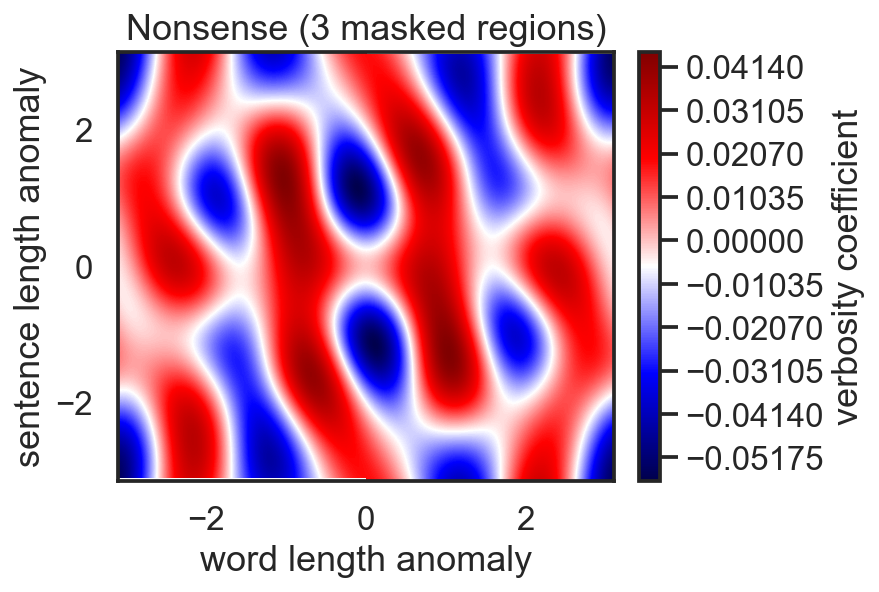

In [27]:
fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(test_x_array,
            test_y_array,
            test_sf_array, 
            1000, cmap=plt.cm.seismic)

# Note that in the following, we explicitly pass in a subset of the contour
# levels used for the filled contours.  Alternatively, we could pass in
# additional levels to provide extra resolution, or leave out the *levels*
# keyword argument to use all of the original levels.

#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r')

ax2.set_title('Nonsense (3 masked regions)')
ax2.set_xlabel('word length anomaly')
ax2.set_ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
